# Topic Modeling

In [1]:
from __future__ import print_function
import pandas as pd

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

### Load preprocessed dataset

In [ ]:
train = pd.read_json('/Dataset_TLDRHQ/processed_dataset/train_1.json"', orient="records", lines=True)

## LDA

### Sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#### Document representation

In [ ]:
docs = got.Text # attributo contenente il testo

In [ ]:
tf_vectorizer = CountVectorizer(min_df=5, max_df=0.5, stop_words='english',
                                token_pattern=r'\b[a-zA-Z]{3,}\b')
dtm_tf = tf_vectorizer.fit_transform(docs)
dtm_tf.shape

(277, 8705)

#### Fit LDA model

In [ ]:
lda_tf = LatentDirichletAllocation(n_components=14, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(n_components=14, random_state=0)

#### Visualize the model with pyLDAvis

How to interpret the visualization ([source](https://community.alteryx.com/t5/Data-Science/Getting-to-the-Point-with-Topic-Modeling-Part-3-Interpreting-the/ba-p/614992)):

- "The intertopic distance map is a visualization of the topics in a two-dimensional space . The area of these topic circles is proportional to the amount of words that belong to each topic across the dictionary. The circles are plotted using a multidimensional scaling algorithm [...] based on the words they comprise, so topics that are closer together have more words in common."
- "You can adjust the words displayed in the bar chart for a topic by adjusting the λ (lambda) slider. Adjusting lambda to values close to 0 highlights potentially rare but more exclusive terms for the selected topic. Larger lambda values (closer to 1) highlight more frequently occurring terms in the document that might not be exclusive to the topic."

In [ ]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne') # anche mdd

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1        1.425140 -203.131439       1        1  17.413835
9       93.696953  -55.018154       2        1  11.948058
6      141.694016   25.320429       3        1  11.020513
4     -126.233505    5.739788       4        1   9.592446
5      -59.868134  101.519302       5        1   7.593024
10     151.966629  133.119141       6        1   7.043651
12      12.542690 -101.441658       7        1   6.596502
7       49.372585   57.773476       8        1   6.246071
11     203.505997  -84.541840       9        1   5.857436
2      119.923477 -166.068970      10        1   3.953362
0      -19.315592   -8.882428      11        1   3.694797
8      -95.841057 -109.373474      12        1   3.598764
13      37.554749  165.057098      13        1   2.724228
3      243.648911   32.733547      14        1   2.717312, topic_info=          Term         Freq        Total Category  logprob  loglift
3874     jaime  1398.000000  1398.000000  Default  30.0000  30.0000
6273       sam   888.000000   888.000000  Default  29.0000  29.0000
8005    tyrion  1990.000000  1990.000000  Default  28.0000  28.0000
301       arya  1470.000000  1470.000000  Default  27.0000  27.0000
1803      dany   890.000000   890.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
6600     ships    20.997715   238.970773  Topic14  -6.0683   1.1736
7004     spear    19.485932   237.145205  Topic14  -6.1430   1.1065
4803  myrcella    17.946428   181.796276  Topic14  -6.2253   1.2900
3018     gates    18.121751   241.012833  Topic14  -6.2156   1.0178
6125    rodrik    16.623754   262.458782  Topic14  -6.3019   0.8463

[865 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
41        9  0.173803  acolyte
41       12  0.753148  acolyte
55        1  0.876742   addarn
76        1  0.039905    aemon
76        2  0.199524    aemon
...     ...       ...      ...
8703      8  0.039871   yunkai
8703      9  0.936961   yunkai
8704      6  0.775739    zollo
8704      8  0.129290    zollo
8704     12  0.064645    zollo

[3520 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 7, 5, 6, 11, 13, 8, 12, 3, 1, 9, 14, 4])

### Gensim

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

#### Document representation

In [ ]:
texts = list(got.Text.str.split())

`texts` contains a list of tokens for each document:

In [ ]:
doc_id = 0
texts[doc_id][:5]

['visitors', 'poured', 'castle', 'gates', 'river']

We need to create a `corpus` to pass to gensim's `LdaModel`. First, we create a dictionary that maps an integer id to each token in the documents (filtering out tokens similarly as with sklearn's `min_df` and `max_df`):

In [ ]:
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
# no_below is the same as sklearn's min_df
# no_above is the same as sklearn's max_df

In [ ]:
dictionary[0]

'able'

Then we use the dictionary to create the `corpus` needed by gensim's LDA.

`corpus[doc_id]` is a list of tuples `(id, freq)`, where `id` is the integer id of a token, and `freq` is its frequency in document `doc_id`

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
corpus[doc_id][:5]

[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1)]

In [ ]:
[(dictionary[k], v) for k, v in corpus[0][:5]]

[('able', 1), ('accepted', 1), ('admitted', 3), ('aerys', 1), ('affection', 1)]

#### Fit LDA model

The LDA gensim model is initialized by passing the corpus as a parameter:

In [ ]:
lda_gensim = LdaModel(corpus, num_topics=14)

#### Visualize the model with pyLDAvis

The model can be visualized with pyLDAvis as follows:

In [ ]:
pyLDAvis.gensim.prepare(lda_gensim, corpus, dictionary, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
6        1.425140 -203.131439       1        1  17.376331
5       93.696953  -55.018154       2        1  13.428382
4      141.694016   25.320429       3        1  10.804483
0     -126.233505    5.739788       4        1  10.086877
9      -59.868134  101.519302       5        1   9.341697
8      151.966629  133.119141       6        1   7.551639
2       12.542690 -101.441658       7        1   7.391195
13      49.372585   57.773476       8        1   6.373920
3      203.505997  -84.541840       9        1   4.446591
10     119.923477 -166.068970      10        1   3.236556
11     -19.315592   -8.882428      11        1   3.119395
1      -95.841057 -109.373474      12        1   2.705915
7       37.554749  165.057098      13        1   2.159708
12     243.648911   32.733547      14        1   1.977312, topic_info=         Term         Freq        Total Category  logprob  loglift
584    tyrion  2017.000000  2017.000000  Default  30.0000  30.0000
289     jaime  1438.000000  1438.000000  Default  29.0000  29.0000
461     sansa  1331.000000  1331.000000  Default  28.0000  28.0000
71    catelyn   995.000000   995.000000  Default  27.0000  27.0000
1003     arya  1600.000000  1600.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
362       ned    10.473086   939.827674  Topic14  -6.4678  -0.5735
688      city     8.715702   534.443772  Topic14  -6.6515  -0.1927
830   mormont     7.943104   438.137061  Topic14  -6.7443  -0.0868
3960    uncle     7.959574   460.223719  Topic14  -6.7423  -0.1339
792     jorah     7.553615   360.300201  Topic14  -6.7946   0.0585

[1083 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5315      1  0.150213      0
5315      2  0.150213      0
5315      4  0.150213      0
5315      6  0.150213      0
5315      7  0.150213      0
...     ...       ...    ...
2952     10  0.033773  yoren
2952     11  0.028144  yoren
2952     12  0.016887  yoren
2952     13  0.016887  yoren
2952     14  0.011258  yoren

[7064 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 5, 1, 10, 9, 3, 14, 4, 11, 12, 2, 8, 13])

### Example

In [ ]:
# Importing modules
import pandas as pd
import os
import re
from wordcloud import WordCloud


# Read data into papers
papers = pd.read_csv('/content/papers.csv')
# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
6389,1993,Learning in Compositional Hierarchies: Inducin...,Abstract Missing,Learning in Compositional Hierarchies:\nInduci...
5994,2016,Dual Decomposed Learning with Factorwise Oracl...,Many applications of machine learning involve ...,Dual Decomposed Learning with Factorwise Oracl...
666,1988,Neural Approach for TV Image Compression Using...,Abstract Missing,264\n\nNEURAL APPROACH FOR TV IMAGE COMPRESSIO...
3998,2012,3D Social Saliency from Head-mounted Cameras,Abstract Missing,3D Social Saliency from Head-mounted Cameras\n...
2248,1990,Reconfigurable Neural Net Chip with 32K Connec...,Abstract Missing,Reconfigurable Neural Net Chip with 32K\nConne...


In [ ]:
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

6389    learning in compositional hierarchies:\ninduci...
5994    dual decomposed learning with factorwise oracl...
666     264\n\nneural approach for tv image compressio...
3998    3d social saliency from head-mounted cameras\n...
2248    reconfigurable neural net chip with 32k\nconne...
Name: paper_text_processed, dtype: object

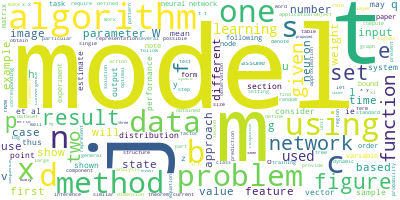

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['learning', 'compositional', 'hierarchies', 'inducing', 'structure', 'objects', 'data', 'joachim', 'utans', 'oregon', 'graduate', 'institute', 'department', 'computer', 'science', 'engineering', 'po', 'box', 'portland', 'utans', 'cseogiedu', 'abstract', 'propose', 'learning', 'algorithm', 'learning', 'hierarchical', 'models', 'object', 'recognition']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 2), (10, 1), (11, 3), (12, 1), (13, 1), (14, 2), (15, 1), (16, 18), (17, 1), (18, 1), (19, 5), (20, 1), (21, 1), (22, 1), (23, 4), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1)]


In [ ]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100)
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.005*"model" + 0.005*"data" + 0.005*"figure" + 0.004*"network" + 0.004*"set" + 0.004*"time" + 0.003*"algorithm" + 0.003*"training" + 0.003*"models" + 0.003*"learning"'), (1, '0.008*"model" + 0.007*"data" + 0.004*"learning" + 0.004*"algorithm" + 0.004*"using" + 0.004*"matrix" + 0.004*"set" + 0.003*"function" + 0.003*"figure" + 0.003*"two"'), (2, '0.010*"model" + 0.006*"learning" + 0.006*"data" + 0.004*"function" + 0.004*"figure" + 0.004*"set" + 0.004*"algorithm" + 0.003*"models" + 0.003*"one" + 0.003*"training"'), (3, '0.007*"model" + 0.006*"data" + 0.005*"models" + 0.005*"algorithm" + 0.004*"set" + 0.004*"one" + 0.004*"learning" + 0.004*"using" + 0.004*"two" + 0.003*"function"'), (4, '0.006*"model" + 0.006*"data" + 0.005*"figure" + 0.004*"algorithm" + 0.004*"log" + 0.004*"learning" + 0.003*"set" + 0.003*"one" + 0.003*"input" + 0.003*"two"'), (5, '0.009*"model" + 0.005*"learning" + 0.005*"data" + 0.004*"algorithm" + 0.004*"problem" + 0.004*"function" + 0.004*"information" + 0.004

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')

In [ ]:
coherence = cm.get_coherence()
print(coherence)

-0.2080314181348164


##Hyperparameter Adjustment

In [ ]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 5
max_topics = 10
step_size = 2
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 0.1, 0.3))
#alpha.append('symmetric')
#alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 0.1, 0.3))
#beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████| 6/6 [00:07<00:00,  1.23s/it]


In [ ]:
model_results

{'Validation_Set': ['75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '100% Corpus',
  '100% Corpus',
  '100% Corpus'],
 'Topics': [5, 7, 9, 5, 7, 9],
 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
 'Beta': [0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
 'Coherence': [-0.24565463209683505,
  -0.21726784595940993,
  -0.2200604048538731,
  -0.2281622828586122,
  -0.2275916085214662,
  -0.21387184215212654]}

In [ ]:
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           alpha=0.01,
                                           eta=0.01)

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"model" + 0.005*"data" + 0.005*"network" + 0.005*"figure" + '
  '0.004*"learning" + 0.004*"algorithm" + 0.004*"time" + 0.004*"set" + '
  '0.003*"input" + 0.003*"using"'),
 (1,
  '0.009*"model" + 0.007*"data" + 0.006*"learning" + 0.004*"using" + '
  '0.004*"function" + 0.004*"algorithm" + 0.003*"set" + 0.003*"matrix" + '
  '0.003*"given" + 0.003*"one"'),
 (2,
  '0.011*"model" + 0.008*"learning" + 0.005*"data" + 0.005*"function" + '
  '0.004*"figure" + 0.004*"algorithm" + 0.004*"set" + 0.003*"one" + '
  '0.003*"time" + 0.003*"models"'),
 (3,
  '0.008*"model" + 0.007*"data" + 0.005*"algorithm" + 0.005*"learning" + '
  '0.005*"models" + 0.004*"function" + 0.004*"one" + 0.004*"set" + '
  '0.004*"using" + 0.004*"time"'),
 (4,
  '0.007*"model" + 0.006*"data" + 0.005*"learning" + 0.005*"algorithm" + '
  '0.005*"log" + 0.004*"figure" + 0.004*"one" + 0.004*"input" + 0.004*"set" + '
  '0.003*"time"')]


## LSA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

In [ ]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

print(len(svd_model.components_))

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")